# Results and comparisons

In [66]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

import utils

## Training time

In [67]:
exectimes = {}

In [68]:
exectimes['Linear'] = {"Time": pd.read_pickle("./results/exectimes/multi_linear.pkl")['Time'].sum()}
exectimes['Dense'] = {"Time": pd.read_pickle("./results/exectimes/multi_dense.pkl")['Time'].sum()}
exectimes['CNN'] = {"Time": pd.read_pickle("./results/exectimes/multi_conv.pkl")['Time'].sum()}
exectimes['LSTM'] = {"Time": pd.read_pickle("./results/exectimes/multi_lstm.pkl")['Time'].sum()}
exectimes['AR LSTM'] = {"Time": pd.read_pickle("./results/exectimes/multi_feedback.pkl")['Time'].sum()}

In [69]:
exectimes_df = pd.DataFrame().from_dict(exectimes).transpose()

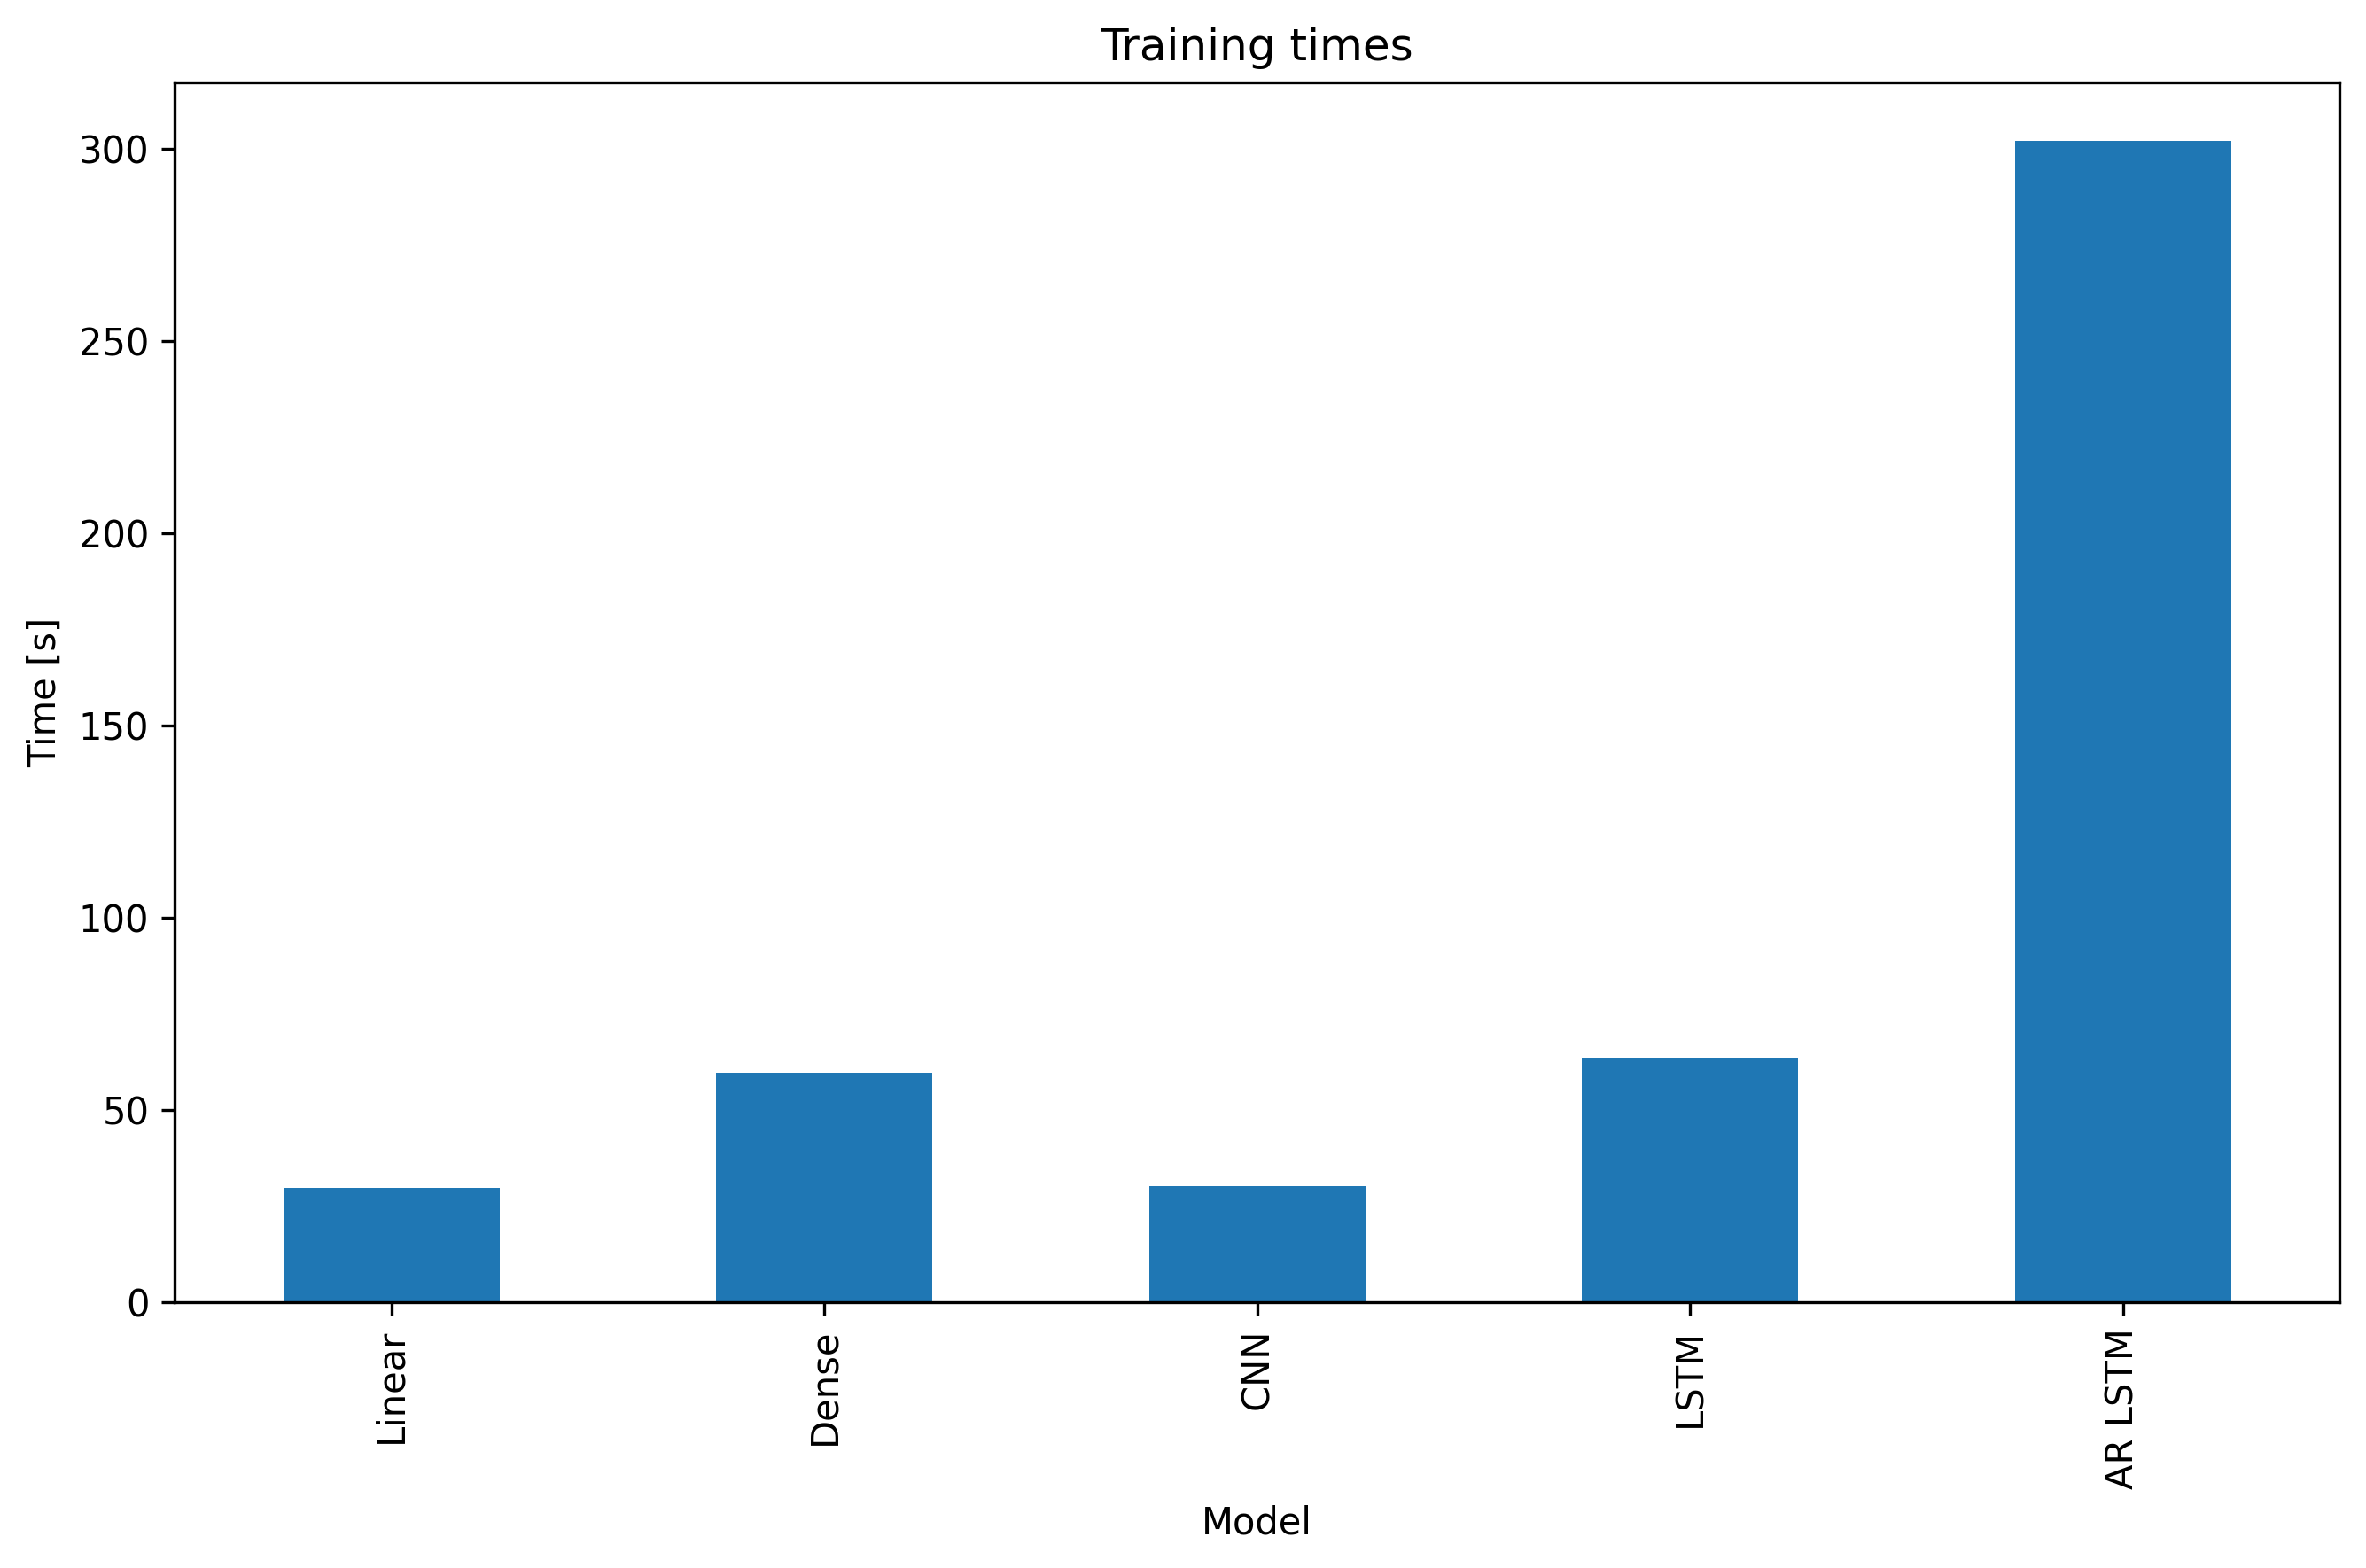

In [70]:
fig = plt.figure(figsize=(9,6), dpi=300)

exectimes_df["Time"].plot.bar()
plt.ylabel("Time [s]")
plt.xlabel("Model")
plt.title("Training times")

plt.tight_layout()
plt.savefig("./plots/results/training_times.jpg")

# plt.show()
# plt.close(fig)


## Metrics

In [71]:
metrics = {}

In [72]:
linear = pd.read_pickle("./results/metrics/multi_linear.pkl")
dense = pd.read_pickle("./results/metrics/multi_dense.pkl")
conv = pd.read_pickle("./results/metrics/multi_conv.pkl")
lstm = pd.read_pickle("./results/metrics/multi_lstm.pkl")
feedback = pd.read_pickle("./results/metrics/multi_feedback.pkl")

metrics['Linear'] = {
    "Pérdida": linear.loc['test'].loss,
    "RMSE": linear.loc['test'].rmse
}
metrics['Dense'] = {
    "Pérdida": dense.loc['test'].loss,
    "RMSE": dense.loc['test'].rmse
}
metrics['CNN'] = {
    "Pérdida": conv.loc['test'].loss,
    "RMSE": conv.loc['test'].rmse
}

metrics['LSTM'] = {
    "Pérdida": lstm.loc['test'].loss,
    "RMSE": lstm.loc['test'].rmse
}
metrics['AR LSTM'] = {
    "Pérdida": feedback.loc['test'].loss,
    "RMSE": feedback.loc['test'].rmse
}

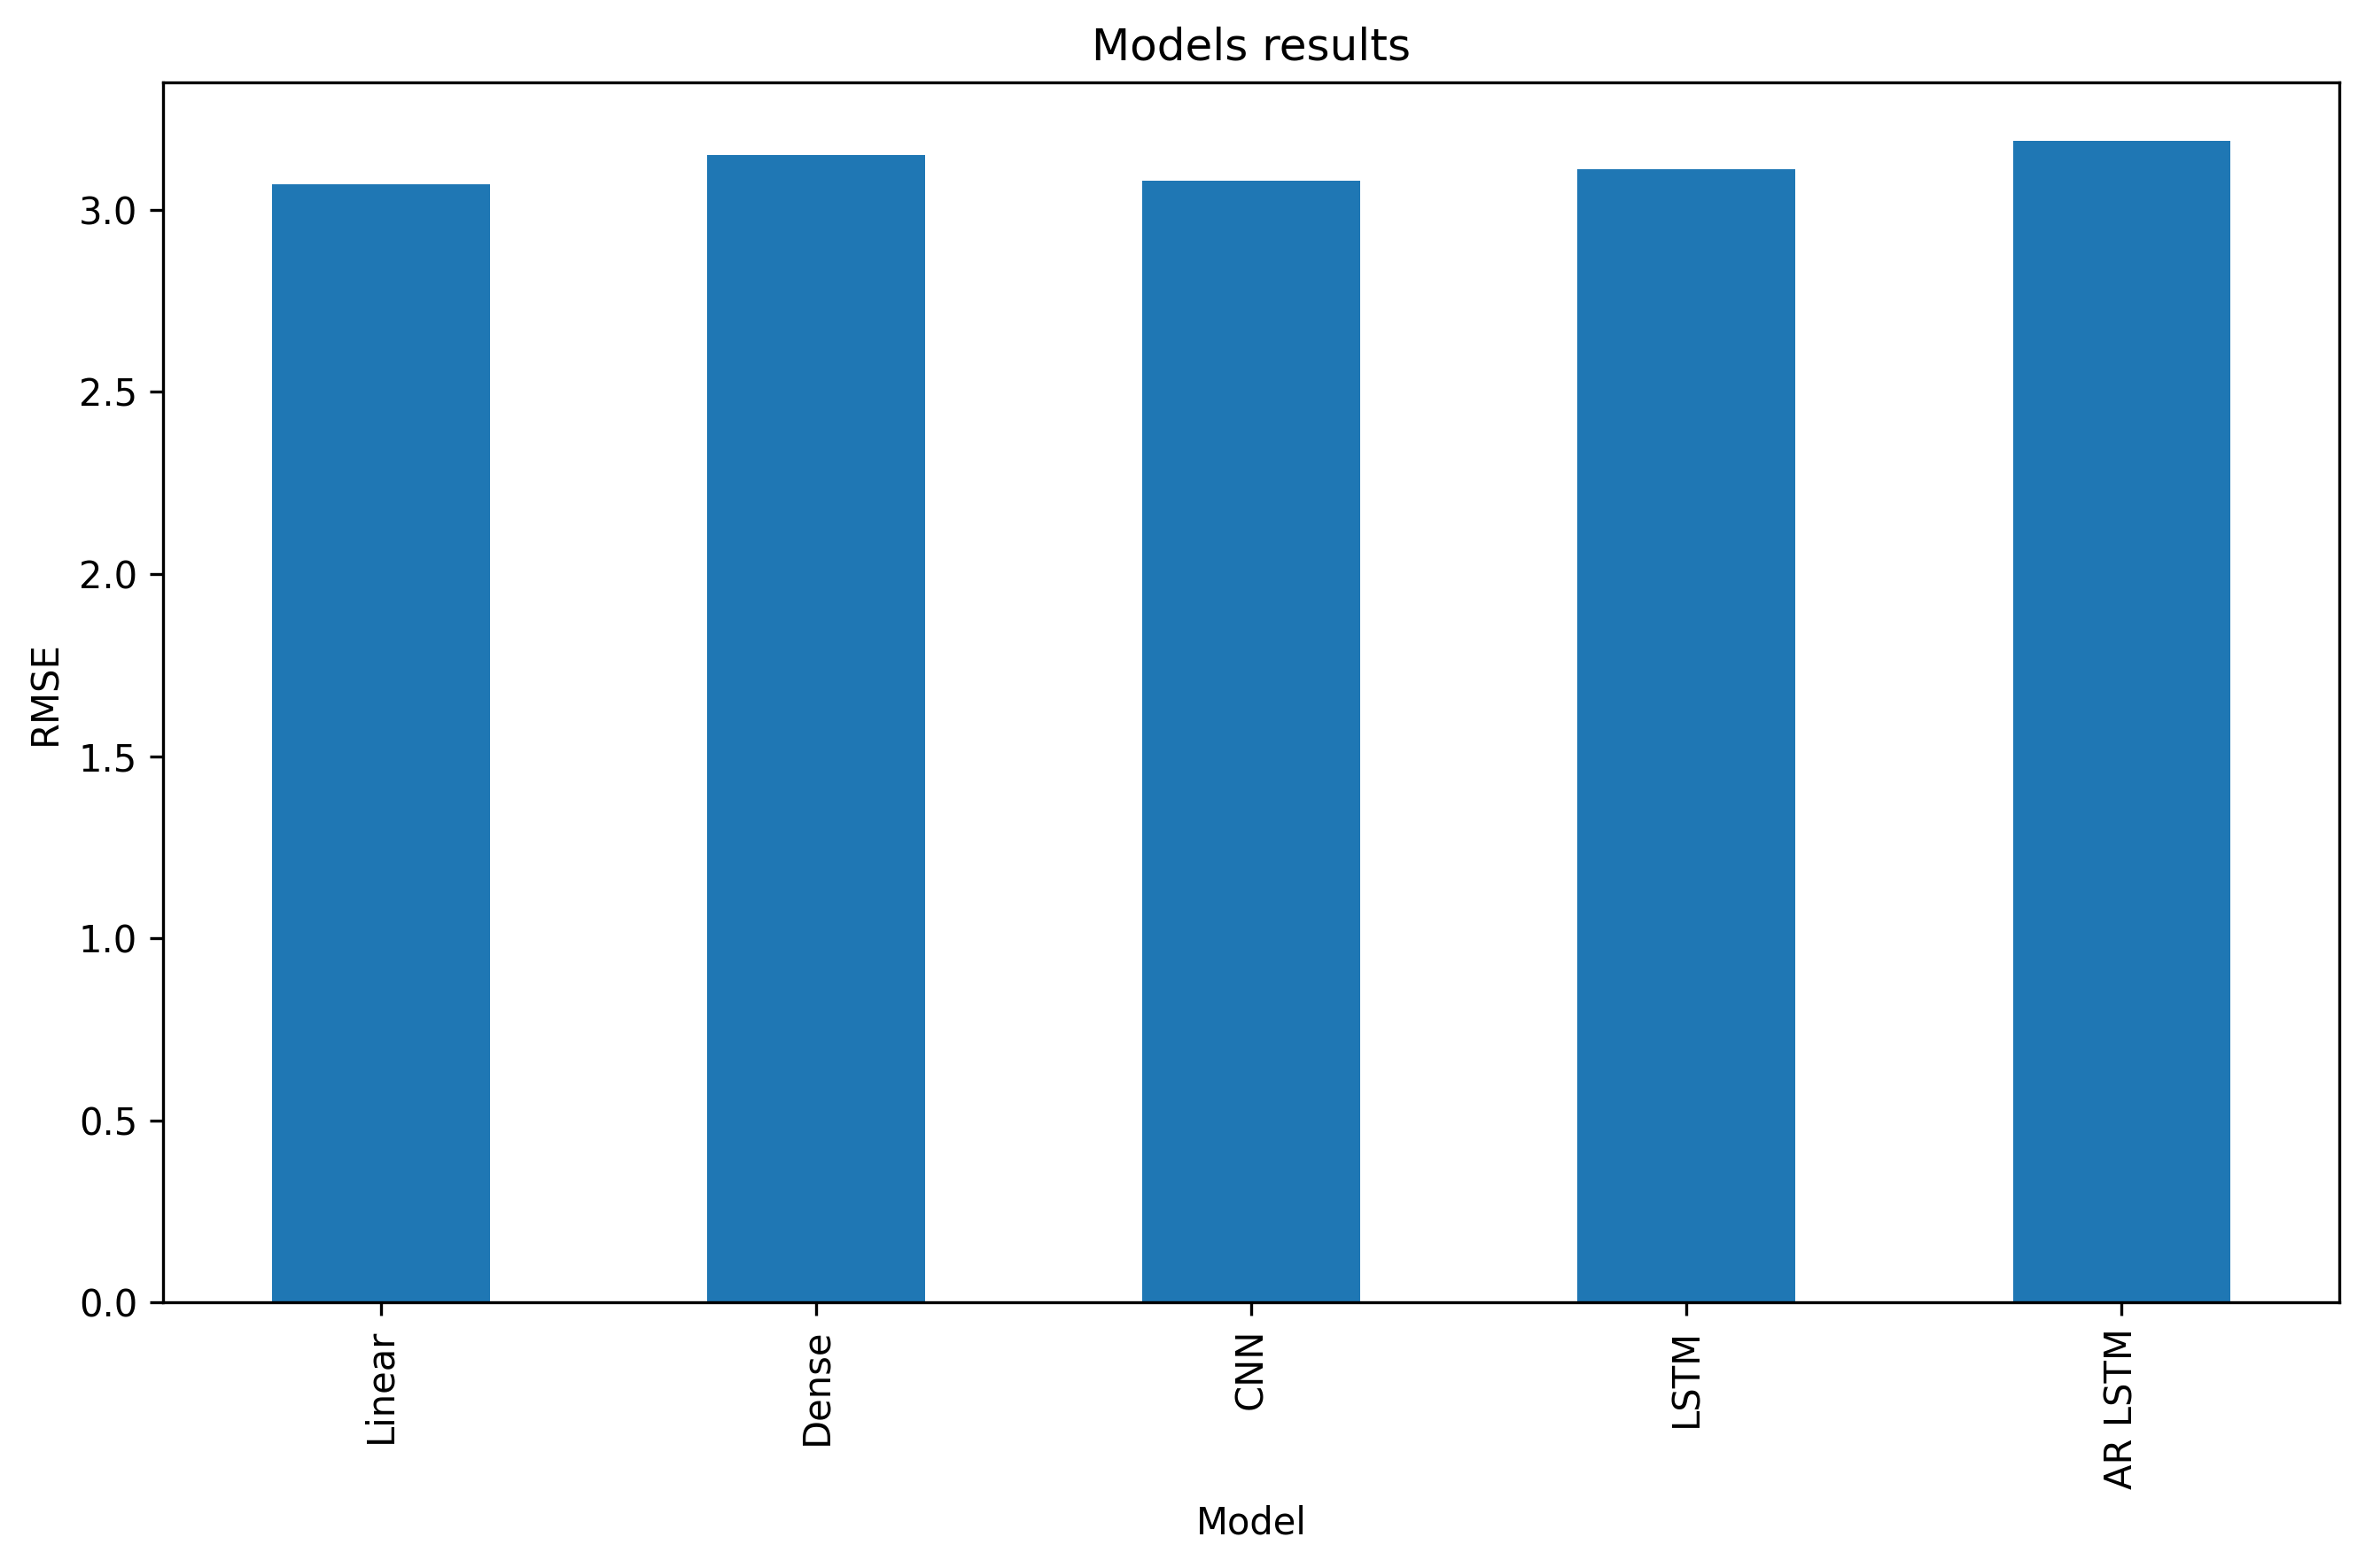

In [73]:
fig, ax = plt.subplots(figsize=(9,6), dpi=300)

pd.DataFrame().from_dict(metrics).transpose()['RMSE'].plot.bar()
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.title("Models results")

plt.tight_layout()
plt.savefig("./plots/results/metrics.jpg")

# plt.show()
# plt.close(fig)